# **Crop Recommendation using Weather And Soil Prediction**

### Project Overview
Farming smarter, not harder! This project focuses on building a Crop Recommendation System that helps farmers select the best crop to cultivate based on soil properties and weather conditions. By analyzing multiple factors, this system aims to empower decision-making for sustainable and productive agriculture.

### Key Features:
Our dataset captures the essence of agricultural and environmental diversity with features like:

- **Soil Properties**:
🟤 Soil Color, 🌡️ pH, and nutrients like Nitrogen (N), Phosphorous (P), Potassium (K), Zinc (Zn), and Sulfur (S).

- **Seasonal Weather Data**:
☁️ Humidity (QV2M), 🌞 Max/Min Temperature (T2M_MAX, T2M_MIN), and 🌧️ Precipitation (PRECTOTCORR) for Winter, Spring, Summer, and Autumn.

- **Additional Metrics**:
🌬️ Wind Speed (WD10M), 🌿 Soil Moisture (GWETTOP), 🌤️ Cloud Cover (CLOUD_AMT), and Pressure (PS).

- **Target Variable**:
🏷️ Label – The ideal crop to grow under given conditions.

### Objective
To predict the most suitable crop for specific soil and weather conditions, ensuring higher yields, resource optimization, and environmentally sustainable farming practices.

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## **1. Problem Understanding**

- **Goal**: To predict the best crop to grow based on soil characteristics (like pH, K, P, etc.) and weather conditions (like temperature, precipitation, etc).
- **Target Variable**: The label column represents the crop type.
- **Features**: Other columns represent features such as soil properties and weather data

## **2. Importing**

### *Importing Libraries*

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### *Importing Dataset*

In [3]:
df = pd.read_csv('data/Crop Recommendation using Soil Properties and Weather Prediction.csv')

In [4]:
columns = df.columns
print(columns)

Index(['Soilcolor', 'Ph', 'K', 'P', 'N', 'Zn', 'S', 'QV2M-W', 'QV2M-Sp',
       'QV2M-Su', 'QV2M-Au', 'T2M_MAX-W', 'T2M_MAX-Sp', 'T2M_MAX-Su',
       'T2M_MAX-Au', 'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su', 'T2M_MIN-Au',
       'PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au',
       'WD10M', 'GWETTOP', 'CLOUD_AMT', 'WS2M_RANGE', 'PS', 'label'],
      dtype='object')


In [5]:
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [6]:
df.describe()

,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,...,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,5.857295,324.284770,11.349588,0.179153,1.774094,11.311625,8.346870,9.082508,12.232020,10.990747,...,8.934315,1.555862,4.023404,14.517500,4.762687,71.579444,0.709028,51.630709,8.262413,78.426168
std,0.676690,202.250133,34.141864,0.066476,1.460809,5.542094,0.613948,0.790654,0.894970,0.993861,...,2.046221,0.691682,1.117531,4.111199,1.394398,80.929898,0.055355,16.328656,9.661188,2.380380
min,4.300000,41.134000,0.000000,0.000262,0.100000,0.050000,7.183333,7.650000,10.476667,9.070000,...,3.980000,0.000000,1.940000,4.836667,2.156667,0.060000,0.520000,0.460000,4.860000,74.170000
25%,5.390000,191.000000,2.000000,0.131200,1.100000,7.305000,7.933333,8.403333,11.430000,10.150000,...,8.260000,0.910000,3.246667,11.866667,3.463333,36.060000,0.690000,48.620000,5.410000,77.150000
50%,5.780000,282.000000,4.000000,0.179884,1.500000,10.700000,8.383333,9.340000,12.166667,10.926667,...,8.380000,1.736667,4.410000,16.620000,5.430000,68.940000,0.730000,59.110000,6.010000,78.250000
75%,6.200000,405.000000,7.920000,0.230000,2.060000,14.195500,8.910000,9.480000,12.836667,11.433333,...,10.700000,2.073333,5.203333,17.816667,5.823333,88.310000,0.740000,59.110000,6.240000,79.610000
max,8.500000,2119.000000,782.000000,0.695600,45.500000,118.347000,9.723333,10.703333,13.853333,12.800000,...,13.643333,2.780000,5.660000,19.920000,7.420000,354.880000,0.800000,59.110000,46.100000,83.760000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soilcolor       3867 non-null   object 
 1   Ph              3867 non-null   float64
 2   K               3867 non-null   float64
 3   P               3867 non-null   float64
 4   N               3867 non-null   float64
 5   Zn              3867 non-null   float64
 6   S               3867 non-null   float64
 7   QV2M-W          3867 non-null   float64
 8   QV2M-Sp         3867 non-null   float64
 9   QV2M-Su         3867 non-null   float64
 10  QV2M-Au         3867 non-null   float64
 11  T2M_MAX-W       3867 non-null   float64
 12  T2M_MAX-Sp      3867 non-null   float64
 13  T2M_MAX-Su      3867 non-null   float64
 14  T2M_MAX-Au      3867 non-null   float64
 15  T2M_MIN-W       3867 non-null   float64
 16  T2M_MIN-Sp      3867 non-null   float64
 17  T2M_MIN-Su      3867 non-null   f

In [8]:
df.dtypes

Soilcolor          object
Ph                float64
K                 float64
P                 float64
N                 float64
Zn                float64
S                 float64
QV2M-W            float64
QV2M-Sp           float64
QV2M-Su           float64
QV2M-Au           float64
T2M_MAX-W         float64
T2M_MAX-Sp        float64
T2M_MAX-Su        float64
T2M_MAX-Au        float64
T2M_MIN-W         float64
T2M_MIN-Sp        float64
T2M_MIN-Su        float64
T2M_MIN-Au        float64
PRECTOTCORR-W     float64
PRECTOTCORR-Sp    float64
PRECTOTCORR-Su    float64
PRECTOTCORR-Au    float64
WD10M             float64
GWETTOP           float64
CLOUD_AMT         float64
WS2M_RANGE        float64
PS                float64
label              object
dtype: object

## **3. Processing**



In this step, we focus on preparing the data for modeling by addressing missing values, outliers, and duplicates. First, we identify and handle missing values using imputation or removal strategies based on the feature type. Next, we detect and address outliers using statistical methods like Z-score or IQR to prevent distortion in the model. Duplicates are checked and removed if necessary. Lastly, we ensure consistency in data types, correcting any inconsistencies to maintain data integrity before model training.

### *Handle Missing Values*

In [9]:
df.isnull().sum()

Soilcolor         0
Ph                0
K                 0
P                 0
N                 0
Zn                0
S                 0
QV2M-W            0
QV2M-Sp           0
QV2M-Su           0
QV2M-Au           0
T2M_MAX-W         0
T2M_MAX-Sp        0
T2M_MAX-Su        0
T2M_MAX-Au        0
T2M_MIN-W         0
T2M_MIN-Sp        0
T2M_MIN-Su        0
T2M_MIN-Au        0
PRECTOTCORR-W     0
PRECTOTCORR-Sp    0
PRECTOTCORR-Su    0
PRECTOTCORR-Au    0
WD10M             0
GWETTOP           0
CLOUD_AMT         0
WS2M_RANGE        0
PS                0
label             0
dtype: int64

### *Encoding Categorical Variables*

In [10]:
df.dtypes

Soilcolor          object
Ph                float64
K                 float64
P                 float64
N                 float64
Zn                float64
S                 float64
QV2M-W            float64
QV2M-Sp           float64
QV2M-Su           float64
QV2M-Au           float64
T2M_MAX-W         float64
T2M_MAX-Sp        float64
T2M_MAX-Su        float64
T2M_MAX-Au        float64
T2M_MIN-W         float64
T2M_MIN-Sp        float64
T2M_MIN-Su        float64
T2M_MIN-Au        float64
PRECTOTCORR-W     float64
PRECTOTCORR-Sp    float64
PRECTOTCORR-Su    float64
PRECTOTCORR-Au    float64
WD10M             float64
GWETTOP           float64
CLOUD_AMT         float64
WS2M_RANGE        float64
PS                float64
label              object
dtype: object

In [11]:
label_encoder = LabelEncoder()
df['Soilcolor'] = label_encoder.fit_transform(df['Soilcolor'])
df['label'] = label_encoder.fit_transform(df['label'])
# Check the transformed data
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,24,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,0
1,24,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,0
2,27,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,0
3,38,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,0
4,38,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,0


In [12]:
data = df.copy()

### **Train/Test Split**

In [13]:
# Dividing The Target Column from Dataset
b = df['label']
A = df.drop(columns=['label'])

In [14]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [15]:
print("Shape of X Train:",A_train.shape)
print("Shape of y Train:",b_train.shape)
print("Shape of X Test:",A_test.shape)
print("Shape of y Test:",b_test.shape)

Shape of X Train: (3093, 28)
Shape of y Train: (3093,)
Shape of X Test: (774, 28)
Shape of y Test: (774,)


### **Modelling**

In [16]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42,probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [17]:
before_results=[]

In [18]:
for name, model in models.items():
    # Fit the model
    model.fit(A_train, b_train)
    
    # Make predictions
    b_pred = model.predict(A_test)
    b_prob = model.predict_proba(A_test)

    
    # Calculate metrics
    accuracy = accuracy_score(b_test, b_pred)
    precision = precision_score(b_test, b_pred, average='weighted')  # Use appropriate average
    recall = recall_score(b_test, b_pred, average='weighted')  # Use appropriate average
    f1 = f1_score(b_test, b_pred, average='weighted')  # Use appropriate average
    auc = roc_auc_score(b_test, b_prob, multi_class='ovr') if b_prob is not None else "Not Applicable"
    
    # Store results
    before_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

In [19]:
# Convert hyper_results to a DataFrame
before_results_df = pd.DataFrame(before_results)
before_results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.431525,0.401745,0.431525,0.367875,0.723233
1,Decision Tree,0.399225,0.406374,0.399225,0.401766,0.569479
2,Support Vector Machine,0.388889,0.368077,0.388889,0.294998,0.691192
3,Random Forest,0.524548,0.472239,0.524548,0.487622,0.785215
4,XGBoost,0.518088,0.488441,0.518088,0.492698,0.776848


## **Pre-Processing**

### *Remove Duplicates*

In [20]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [21]:
count = data['label'].value_counts()
print(count)

label
10    1260
4      732
11     715
0      503
1      253
6       94
9       72
2       71
5       64
7       48
8       29
3       26
Name: count, dtype: int64


##### *The dataset has been checked for *missing values*, and there are *no null values* present across any feature.*

### *Finding Outliers*

#### *IQR Method for Outlier Detection*

In [22]:
def detect_outliers_lof(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])    
    # Fit the LOF model
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    outliers = model.fit_predict(df_numeric)    
    # -1 indicates an outlier, 1 indicates a normal point
    outlier_indices = df_numeric.index[outliers == -1].tolist()    
    return outlier_indices

outliers_lof = detect_outliers_lof(data)
print("Outlier indices:", outliers_lof)

Outlier indices: [4, 7, 9, 11, 14, 25, 34, 35, 49, 57, 67, 85, 135, 157, 158, 162, 192, 198, 204, 207, 214, 220, 238, 275, 276, 304, 319, 400, 409, 414, 438, 442, 530, 531, 547, 548, 551, 565, 583, 598, 600, 613, 614, 638, 660, 704, 706, 717, 720, 729, 730, 738, 741, 742, 745, 747, 748, 749, 764, 851, 854, 855, 889, 891, 916, 921, 930, 932, 1028, 1055, 1058, 1074, 1094, 1118, 1136, 1184, 1219, 1229, 1344, 1420, 1421, 1424, 1466, 1476, 1495, 1519, 1548, 1558, 1584, 1594, 1769, 1773, 1789, 1790, 1853, 1919, 1932, 1942, 2004, 2015, 2047, 2088, 2137, 2142, 2162, 2165, 2170, 2173, 2194, 2205, 2248, 2250, 2291, 2294, 2301, 2302, 2313, 2318, 2328, 2344, 2369, 2370, 2416, 2483, 2491, 2552, 2643, 2650, 2660, 2856, 2915, 2927, 2972, 2984, 3077, 3092, 3101, 3103, 3123, 3140, 3143, 3144, 3147, 3160, 3170, 3173, 3188, 3193, 3200, 3228, 3302, 3303, 3327, 3354, 3355, 3357, 3393, 3409, 3480, 3505, 3515, 3533, 3555, 3586, 3612, 3617, 3636, 3640, 3665, 3683, 3700, 3706, 3709, 3714, 3726, 3731, 3733, 373

In [23]:
# Remove outliers
print("Shape of original data:", data.shape)
data = data.drop(index=outliers_lof)
print("Shape of cleaned data:", data.shape)

Shape of original data: (3867, 29)
Shape of cleaned data: (3673, 29)


### *Standardize Data Types*

To ensure data consistency, we will standardize the data types across all columns. For columns with **categorical data** (dtype 'object'), we will convert them to **strings**. For **numerical columns**, we will ensure they are of type **float**. This step helps maintain uniformity and prevents issues during model training.

In [24]:
# Ensure consistent data types
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
    else:
        data[col] = data[col].astype(float)

### *Heatmap (Co-relation Matrix*

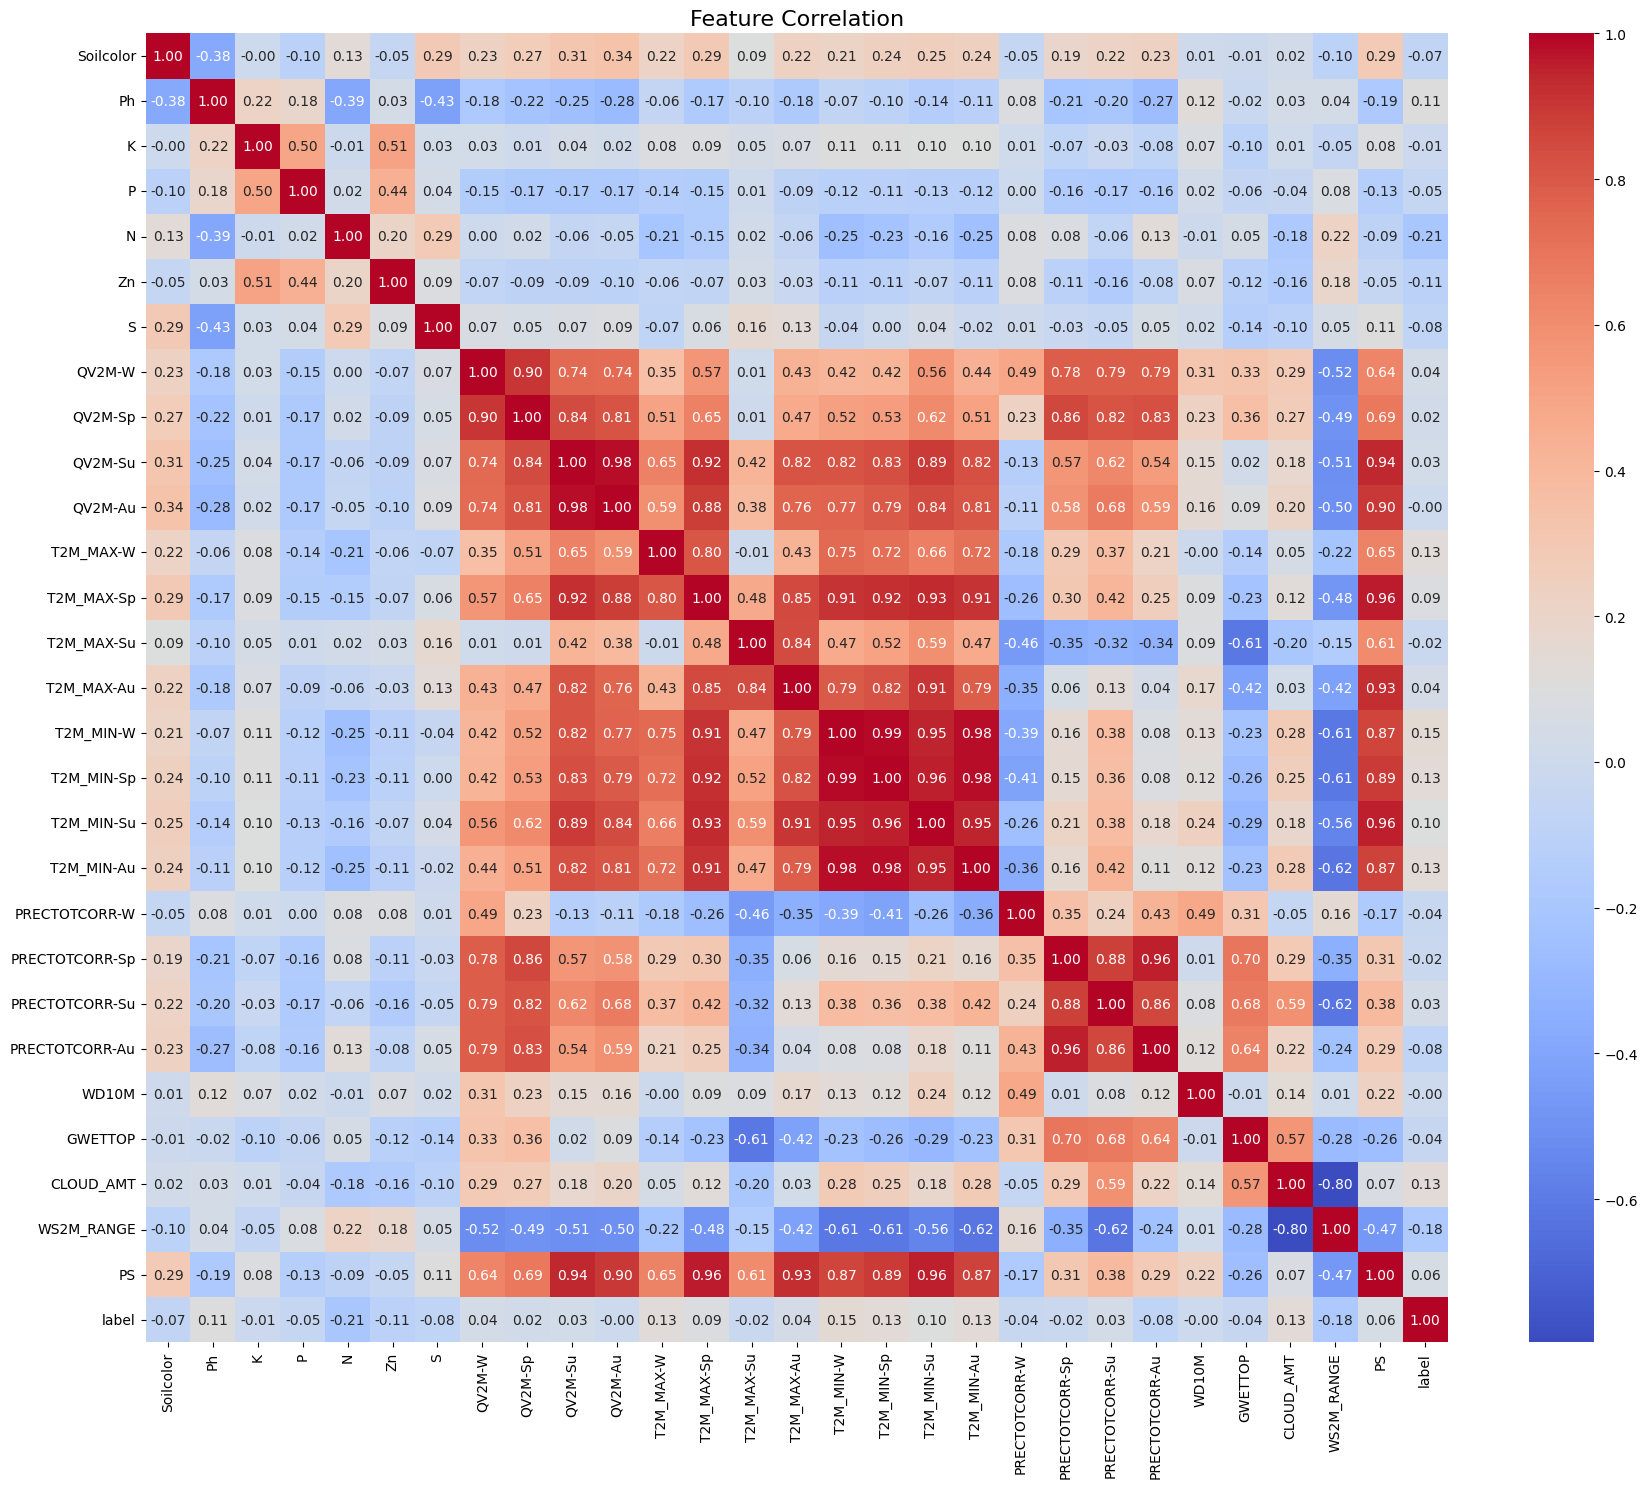

In [25]:
# Adjusting the figure size and font size for better readability
plt.figure(figsize=(21, 17))  # Increase figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust font size
plt.title("Feature Correlation", fontsize=16)  # Increase title font size
plt.xticks(fontsize=10)  # Adjust x-axis font size
plt.yticks(fontsize=10)  # Adjust y-axis font size
plt.show()

### ***Checking If Dataset is Imbalanced or Not?***

In [26]:
print(data['label'].value_counts())

label
10.0    1212
4.0      703
11.0     664
0.0      471
1.0      227
6.0       94
9.0       71
2.0       70
5.0       63
7.0       44
8.0       29
3.0       25
Name: count, dtype: int64


In [27]:
print(data['label'].value_counts(normalize=True))

label
10.0    0.329975
4.0     0.191397
11.0    0.180779
0.0     0.128233
1.0     0.061802
6.0     0.025592
9.0     0.019330
2.0     0.019058
5.0     0.017152
7.0     0.011979
8.0     0.007895
3.0     0.006806
Name: proportion, dtype: float64


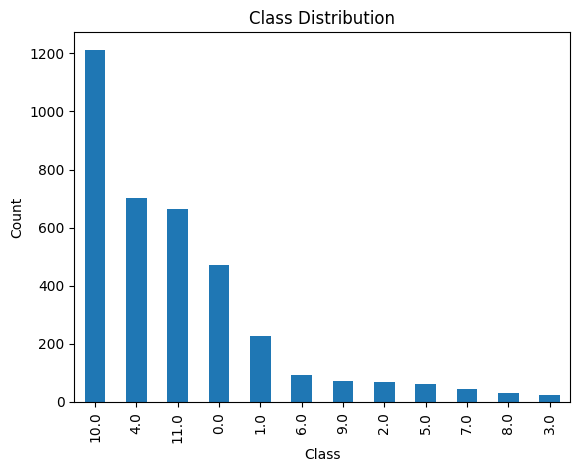

In [28]:
data['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### **This is Imbalanced Dataset**

## **4. Dimensionality Reduction**

### *Principal Component Analysis (PCA)*

PCA transforms the data into new axes (principal components) that maximize variance, reducing dimensions while retaining the most important information.

In [29]:
pca = PCA(n_components=20)
data_pca = pca.fit_transform(data) # storing in different Dataset variable

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [8.27828213e-01 1.52351132e-01 8.66720721e-03 7.27701288e-03
 1.35343516e-03 8.83344695e-04 5.29041453e-04 3.87616874e-04
 3.38381710e-04 2.58172036e-04 6.94906477e-05 2.15821018e-05
 1.77867693e-05 6.49569949e-06 5.78275020e-06 2.63449547e-06
 1.09816598e-06 6.75796080e-07 5.62726137e-07 1.63197395e-07]


## **5. Feature Selection**

**Feature selection helps in:**
- **Improving Model Performance**: Removing irrelevant features reduces noise and enhances accuracy.
- **Faster Computation**: Fewer features mean quicker training and inference.
- **Avoiding Overfitting**: Reduces complexity and prevents models from learning spurious patterns.

*Using a Copy Of dataset, because I don't want to disturb my main dataset "data"*

#### *Chi-Square feature selection*

In [30]:
df = data.copy()

In [31]:
# Separate features (X) and target (y)
A = df.drop(columns=['label'],axis=1)  # Features
b = df['label']                # Target

In [32]:
# Apply Chi-Square test to select top 2 features
chi2_selector = SelectKBest(chi2, k=20)
X_selected = chi2_selector.fit_transform(A,b)

In [33]:
# Get the names of the selected features
selected_columns = A.columns[chi2_selector.get_support()]
print("Selected Features:", selected_columns)

Selected Features: Index(['Soilcolor', 'K', 'P', 'Zn', 'S', 'QV2M-Su', 'QV2M-Au', 'T2M_MAX-W',
       'T2M_MAX-Sp', 'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su', 'T2M_MIN-Au',
       'PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au',
       'WD10M', 'CLOUD_AMT', 'WS2M_RANGE'],
      dtype='object')


- As we have some important features at the top, I don't want to drop them!
- If Model got less accuracy, then I will use this Feature Selection

#### *Regularization*

In [34]:
# Split data
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.001) # alpha controls regularization strength
lasso.fit(A_train, b_train)

# Print coefficients
print("Lasso Coefficients:", lasso.coef_)

# Evaluate the model
print("Lasso R^2 Score:", lasso.score(A_test, b_test))

Lasso Coefficients: [-2.30131555e-02  2.76342153e-03 -4.40374605e-04 -3.34425107e-03
 -7.48308499e+00 -1.34712489e-01  7.89889982e-03  4.46572754e+00
 -2.65641234e+00  0.00000000e+00 -2.88187328e+00 -2.76822406e-02
  8.67805523e-01 -1.23600198e+00  2.80815362e-01  1.23857593e+00
 -1.93112764e+00 -8.58171666e-01  3.08129850e-01 -4.41773466e+00
  2.62191674e-01 -3.65493297e-02  3.97373824e-01  2.35039522e-02
  0.00000000e+00 -1.53319967e-01 -3.28673299e-01  6.06044510e-01]
Lasso R^2 Score: 0.10687753275734413


In [35]:
selected_features = A.columns[lasso.coef_ == 0]
print("Selected Features:", selected_features)

Selected Features: Index(['QV2M-Su', 'GWETTOP'], dtype='object')


**Identifying the features with non-zero coefficients, as these are the features contributing to the model’s predictions.**

- but We are Not going To use these Features
- if Model accuracy is Low, We gonna Use This!

### *Data Transformation*

In [36]:
# Initialize the scaler
scaler = MinMaxScaler()

In [37]:
# Separate features and target
X = data.drop(columns=['label'])  # Drop the target column
y = data['label']  # Target column

In [38]:
# Scale the features
scaled_features = scaler.fit_transform(X)

In [39]:
# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=X.columns)

In [40]:
# Add the target column back to the DataFrame
data_scaled['label'] = y.values

In [41]:
# Check the first few rows of the scaled data
data_scaled.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,0.523810,0.359524,0.468836,0.017414,0.395189,0.130136,0.353427,0.318898,0.919214,0.440276,...,0.745803,0.895161,0.495028,0.591514,0.009526,0.75,0.956692,0.033463,0.298227,0.0
1,0.523810,0.269048,0.380161,0.033783,0.395189,0.134706,0.420308,0.318898,0.919214,0.440276,...,0.745803,0.895161,0.495028,0.591514,0.009526,0.75,0.956692,0.033463,0.298227,0.0
2,0.595238,0.264286,0.232332,0.022076,0.395189,0.294615,0.423800,0.318898,0.919214,0.440276,...,0.745803,0.895161,0.495028,0.591514,0.009526,0.75,0.956692,0.033463,0.298227,0.0
3,0.857143,0.321429,0.111612,0.011020,0.395189,0.016298,0.411425,0.318898,0.919214,0.440276,...,0.745803,0.895161,0.495028,0.591514,0.009526,0.75,0.956692,0.033463,0.298227,0.0
4,0.595238,0.180952,0.072167,0.027341,0.395189,0.199593,0.454557,0.318898,0.919214,0.440276,...,0.745803,0.895161,0.495028,0.591514,0.009526,0.75,0.956692,0.033463,0.298227,0.0


In [42]:
data_scaled['label'].value_counts()

label
10.0    1212
4.0      703
11.0     664
0.0      471
1.0      227
6.0       94
9.0       71
2.0       70
5.0       63
7.0       44
8.0       29
3.0       25
Name: count, dtype: int64

## **6. Modelling**

### *We Are going to Apply Following Models On Our Dataset:*
**- Logistic Regression (LR)**\
**- Support Vector Machine (SVM)**\
**- Random Forest (RF)**\
**- Decision Tree (DT)**\
**- Gradient Boosting (GB)**

### **Train/Test Split**

In [43]:
# Dividing The Target Column from Dataset
y = data_scaled['label']
X = data_scaled.drop(columns=['label'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Shape of X Train:",X_train.shape)
print("Shape of y Train:",y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (2938, 28)
Shape of y Train: (2938,)
Shape of X Test: (735, 28)
Shape of y Test: (735,)


### **Modelling**

In [46]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42,probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [47]:
# Results storage
results = []

In [48]:
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use appropriate average
    recall = recall_score(y_test, y_pred, average='weighted')  # Use appropriate average
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use appropriate average
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else "Not Applicable"
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

In [49]:
# Print results
for result in results:
    print(result)

{'Model': 'Logistic Regression', 'Accuracy': 0.44081632653061226, 'Precision': np.float64(0.3865982641027849), 'Recall': np.float64(0.44081632653061226), 'F1-Score': np.float64(0.37898152029195376), 'AUC': np.float64(0.7870290036813029)}
{'Model': 'Decision Tree', 'Accuracy': 0.3659863945578231, 'Precision': np.float64(0.37269418350028055), 'Recall': np.float64(0.3659863945578231), 'F1-Score': np.float64(0.36567599336794115), 'AUC': np.float64(0.5629357004244503)}
{'Model': 'Support Vector Machine', 'Accuracy': 0.4326530612244898, 'Precision': np.float64(0.40388447281562506), 'Recall': np.float64(0.4326530612244898), 'F1-Score': np.float64(0.3667945297800127), 'AUC': np.float64(0.7471842366581752)}
{'Model': 'Random Forest', 'Accuracy': 0.4857142857142857, 'Precision': np.float64(0.45566482160610866), 'Recall': np.float64(0.4857142857142857), 'F1-Score': np.float64(0.450374365665003), 'AUC': np.float64(0.7386219162047434)}
{'Model': 'XGBoost', 'Accuracy': 0.46258503401360546, 'Precisio

In [50]:
# Convert hyper_results to a DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.440816,0.386598,0.440816,0.378982,0.787029
1,Decision Tree,0.365986,0.372694,0.365986,0.365676,0.562936
2,Support Vector Machine,0.432653,0.403884,0.432653,0.366795,0.747184
3,Random Forest,0.485714,0.455665,0.485714,0.450374,0.738622
4,XGBoost,0.462585,0.433889,0.462585,0.437578,0.757943


## **7. Hyperparameter tuning**

In [51]:
results=[]

### *Logistic Regression (No Tuning)*

In [52]:
# Fit the grid search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(max_iter=500, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Make predictions
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)

# Metrics calculation
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


In [53]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')  # Specify average
recall = recall_score(y_test, y_pred_lr, average='weighted')        # Specify average
f1 = f1_score(y_test, y_pred_lr, average='weighted')                # Specify average

# For AUC, you can compute it per class if y_test is multiclass
try:
    auc = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')       # For multiclass
except ValueError:
    auc = "AUC not computable for the current target type."

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"AUC: {auc}")

Accuracy: 0.4408
Precision (weighted): 0.4150
Recall (weighted): 0.4408
F1 Score (weighted): 0.3842
AUC: 0.7924462740407248


In [54]:
# Append Logistic Regression metrics to the results list
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc if isinstance(auc, (float, int)) else "Not Applicable"
})

### *Decision Tree*

In [55]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Retrieve the best model and parameters
best_dt = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [56]:
# Make predictions
y_pred_dt = best_dt.predict(X_test)

# Ensure the model supports predict_proba before using it for AUC calculation
y_prob_dt = best_dt.predict_proba(X_test) if hasattr(best_dt, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_dt, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_dt, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_dt, multi_class='ovr') if y_prob_dt is not None else "Not Applicable"

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"AUC: {auc}")

Accuracy: 0.4313
Precision (weighted): 0.5748
Recall (weighted): 0.4313
F1 Score (weighted): 0.3791
AUC: 0.7144060910911098


In [57]:
# Append the results to the `results` list
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *Support Vector Machine*

In [58]:
# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model (with probability=True for AUC calculation)
svc = SVC(random_state=42, probability=True)

# Perform Grid Search with 5-fold cross-validation
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Retrieve the best model and parameters
best_svc = grid_search_svc.best_estimator_
print(f"Best Parameters for SVM: {grid_search_svc.best_params_}")

Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [59]:
# Make predictions
y_pred_svc = best_svc.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_svc = best_svc.predict_proba(X_test) if hasattr(best_svc, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_svc, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_svc, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_svc, multi_class='ovr') if y_prob_svc is not None else "Not Applicable"

# Print metrics for SVM
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")


Accuracy: 0.4231
Precision: 0.5691
Recall: 0.4231
F1 Score: 0.3501
AUC: 0.7455087474513277


In [60]:
# Append the results to the `results` list
results.append({
    "Model": "SVM",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *Random Forest*

In [61]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Retrieve the best model and parameters
best_rf = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [62]:
# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_rf = best_rf.predict_proba(X_test) if hasattr(best_rf, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_rf, multi_class='ovr') if y_prob_rf is not None else "Not Applicable"

# Print metrics for Random Forest
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")


Accuracy: 0.4422
Precision: 0.5886
Recall: 0.4422
F1 Score: 0.3803
AUC: 0.7700720280596721


In [63]:
# Append the results to the `results` list
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *XGBoost*

In [64]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Initialize the XGBoost model with a specific evaluation metric
xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Retrieve the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [65]:
# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_xgb = best_xgb.predict_proba(X_test) if hasattr(best_xgb, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
auc = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr') if y_prob_xgb is not None else "Not Applicable"

# Print metrics for XGBoost
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")

Accuracy: 0.4490
Precision: 0.5612
Recall: 0.4490
F1 Score: 0.4011
AUC: 0.7078795738760321


In [66]:
# Append the results to the `results` list
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

#### *Since the metrics are in plain text or np arrays, let's convert them into a DataFrame and display it.*

### *Combine All Results*

In [68]:
results_df =pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.440816,0.414994,0.440816,0.384156,0.792446
1,Decision Tree,0.431293,0.574775,0.431293,0.379056,0.714406
2,SVM,0.423129,0.569094,0.423129,0.350112,0.745509
3,Random Forest,0.442177,0.588598,0.442177,0.380329,0.770072
4,XGBoost,0.448980,0.561159,0.448980,0.401121,0.707880


In [69]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.44081632653061226,
  'Precision': np.float64(0.4149939086790532),
  'Recall': np.float64(0.44081632653061226),
  'F1-Score': np.float64(0.38415563269439507),
  'AUC': np.float64(0.7924462740407248)},
 {'Model': 'Decision Tree',
  'Accuracy': 0.4312925170068027,
  'Precision': np.float64(0.5747754596623394),
  'Recall': np.float64(0.4312925170068027),
  'F1-Score': np.float64(0.37905565647770895),
  'AUC': np.float64(0.7144060910911098)},
 {'Model': 'SVM',
  'Accuracy': 0.4231292517006803,
  'Precision': np.float64(0.5690937299959856),
  'Recall': np.float64(0.4231292517006803),
  'F1-Score': np.float64(0.3501117722706087),
  'AUC': np.float64(0.7455087474513277)},
 {'Model': 'Random Forest',
  'Accuracy': 0.4421768707482993,
  'Precision': np.float64(0.588597687282696),
  'Recall': np.float64(0.4421768707482993),
  'F1-Score': np.float64(0.3803291144481152),
  'AUC': np.float64(0.7700720280596721)},
 {'Model': 'XGBoost',
  'Accuracy': 0

### Evaluation Metrics Explained
- **Accuracy:** Measures how many predictions were correct out of all predictions.
- **Precision:** Focuses on the correctness of positive predictions.
- **Recall:** Emphasizes the completeness of positive predictions.
- **F1-Score:** Balances precision and recall.
- **AUC-ROC:** Indicates the model's discriminative ability.

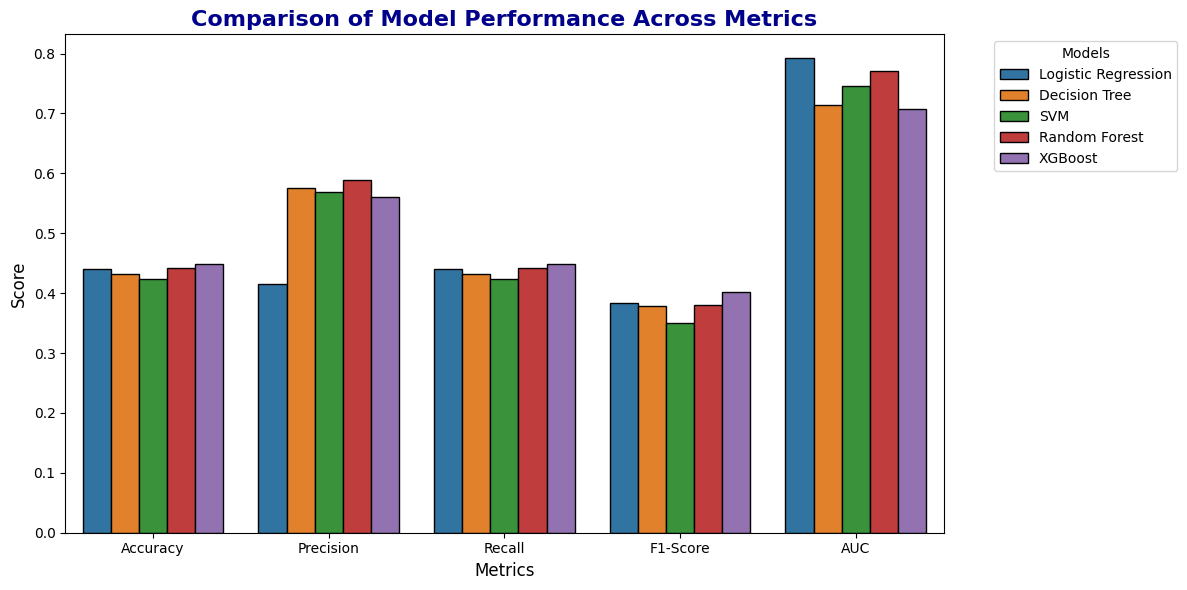

In [70]:
# Define the metrics to analyze and reshape the data
metrics = ["Accuracy", "Precision", "Recall", "F1-Score","AUC"]
results_subset = results_df.set_index("Model")[metrics].reset_index()
# Transform data into a long format for easier plotting
results_melted = results_subset.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", edgecolor="black")

plt.title("Comparison of Model Performance Across Metrics", fontsize=16, weight='bold', color='darkblue')
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

## Conclusion

In this project, we aimed to recommend the best crops using machine learning models, considering soil and weather data. Here's the fun part: 

- **Logistic Regression** takes the lead! With the highest **AUC of 79.24%**, it shows the best ability to distinguish between different crop outcomes, making it the most reliable model in this context. 

- **Random Forest** and **XGBoost** also perform well, but Logistic Regression shines with its strong AUC, making it the top choice for predicting crop suitability based on given conditions.

So, for making the most accurate crop recommendations, **Logistic Regression** is our winner! 🌱